In [43]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import os
import os.path
from pathlib import Path
from scipy import signal

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

_script_path = Path().absolute() #location of our script
_dataset_folder_name = 'Emotion_Dataframes'
_dataset_folder_path = os.path.join(str(_script_path), _dataset_folder_name)
_file_names = []
_folder_locations = []
_dataset_list = [] 
    


def list_all_files():
        for dirpath, dirnames, filenames in os.walk(_dataset_folder_path):
            for filename in [f for f in filenames if f.endswith(".csv")]:
                location = os.path.join(dirpath, filename)
                _folder_locations.append(location)
                _file_names.append(filename)
                
def load_datasets():
        for location in _folder_locations:
            _dataset_list.append(pd.read_csv(location))
    
            
def apply_filter():
#edit this method to implement your own filter
    filtered_dataset_list = []        
    fs = 290
    if _dataset_list:
        for data in _dataset_list:
            ecg = data.iloc[:,0]
            result = butter_highpass_filter(ecg,1,fs)
            low_pass_filter(result,5)
            result = signal.medfilt(result,5)
            np.clip(result, -1, 1)
            temp = data.copy()
            temp.drop(["ecg"], axis = 1)
            temp['ecg'] = result.tolist()
            filtered_dataset_list.append(temp)
             
    return filtered_dataset_list

def low_pass_filter(values,smoothing):
    value = values[0]
    for index,item in enumerate(values):
        currentValue = values[index]
        value += (currentValue-value) / smoothing
        values[index] = value

'''
# ----------------- ploting part ------------------
i = 6
df_org = _dataset_list[i]
timest_org = df_org.iloc[:,-1]
ecg_org = df_org.iloc[:,0]

df = filtered_dataset[i]
timest = df.iloc[:,-1]
ecg = df.iloc[:,0]

from pylab import rcParams
rcParams['figure.figsize'] = 25.5, 10.5


plt.figure(1)
plt.subplot(211)
plt.plot(timest,ecg)

plt.subplot(212)
plt.plot(timest_org,ecg_org)
plt.show()
'''


"\n# ----------------- ploting part ------------------\ni = 6\ndf_org = _dataset_list[i]\ntimest_org = df_org.iloc[:,-1]\necg_org = df_org.iloc[:,0]\n\ndf = filtered_dataset[i]\ntimest = df.iloc[:,-1]\necg = df.iloc[:,0]\n\nfrom pylab import rcParams\nrcParams['figure.figsize'] = 25.5, 10.5\n\n\nplt.figure(1)\nplt.subplot(211)\nplt.plot(timest,ecg)\n\nplt.subplot(212)\nplt.plot(timest_org,ecg_org)\nplt.show()\n"

In [44]:
list_all_files()
load_datasets()
filtered_dataset = apply_filter()

In [40]:
def filter_draw(data,high_pass_filter_size,median_filter_size,low_pass_filter_size,apply_high_pass,fs=290):
    
    ecg = data.iloc[:,0]
    if apply_high_pass==True:
        result = butter_highpass_filter(ecg,high_pass_filter_size,fs)
        low_pass_filter(result,low_pass_filter_size)
        result = signal.medfilt(result,median_filter_size)
    else:
        result = signal.medfilt(ecg,median_filter_size)
    temp = data.copy()
    temp.drop(["ecg"], axis = 1)
    temp['ecg'] = result.tolist()
    
    df_org = data
    timest_org = df_org.iloc[:,-1]
    ecg_org = df_org.iloc[:,0]

    df = temp
    timest = df.iloc[:,-1]
    ecg = df.iloc[:,0]

    from pylab import rcParams
    rcParams['figure.figsize'] = 35.5, 15.5


    plt.figure(1)
    plt.subplot(211)
    plt.plot(timest,ecg)

    plt.subplot(212)
    plt.plot(timest_org,ecg_org)
    plt.show()
    return temp

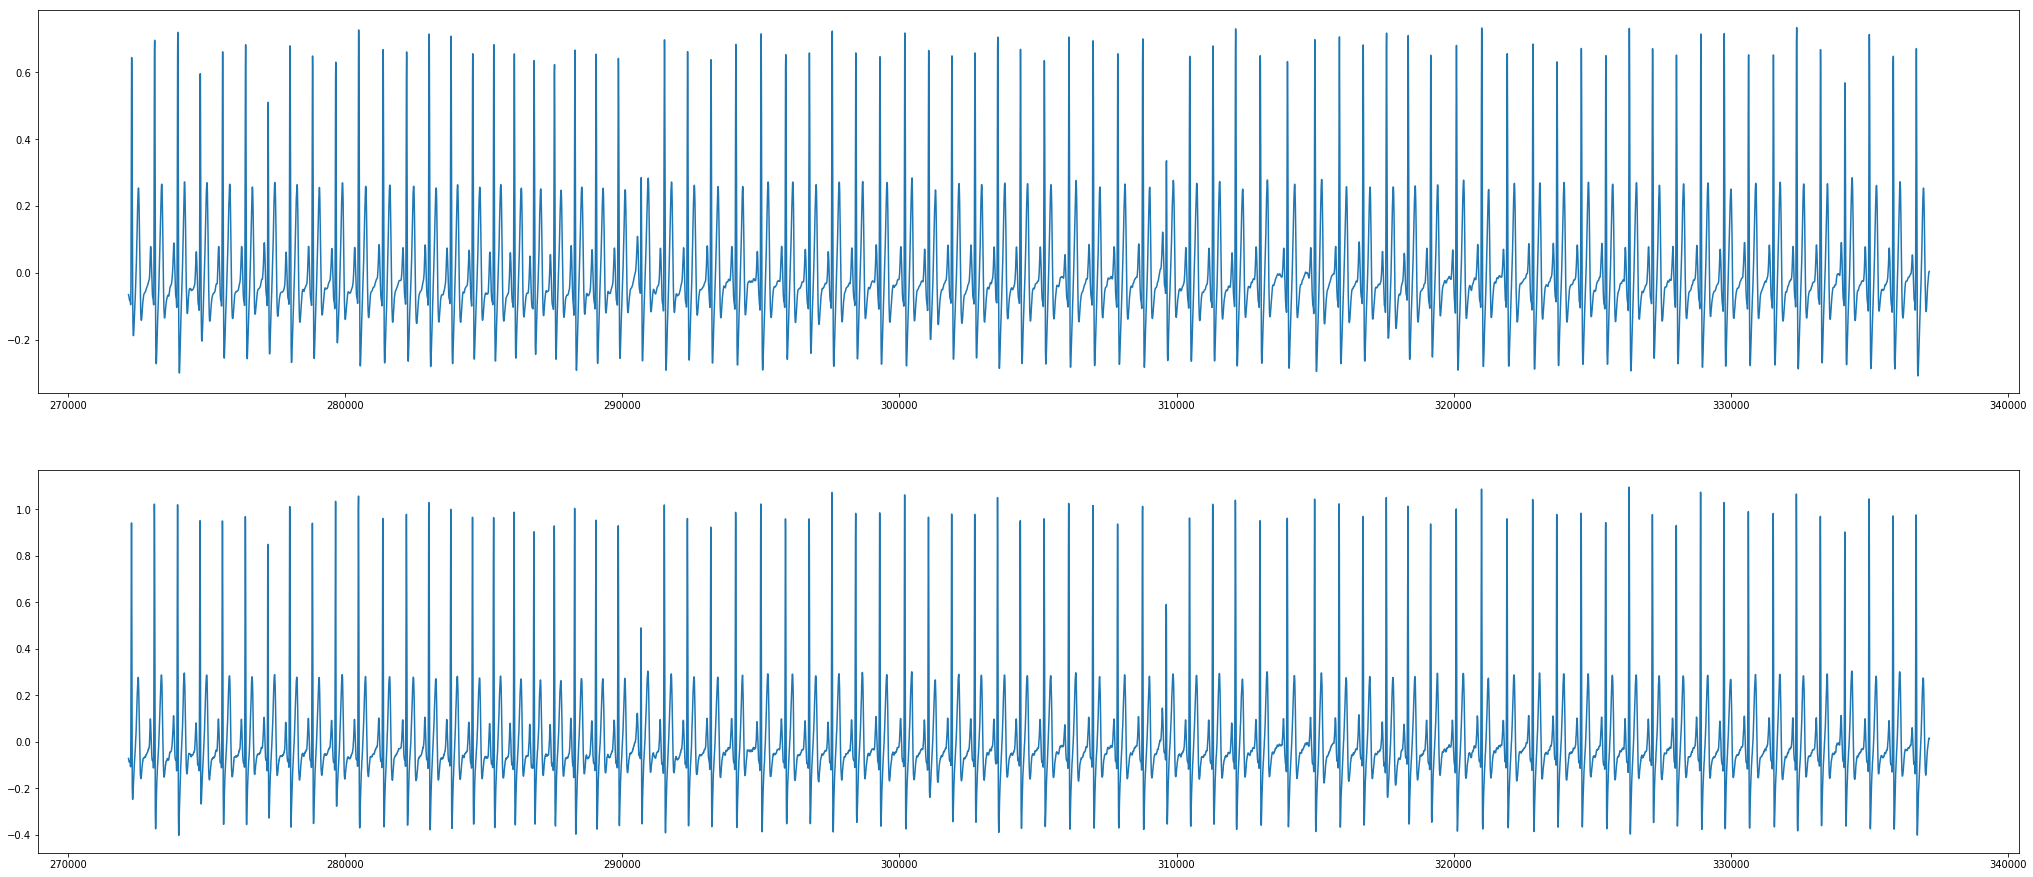

In [51]:
temp = filter_draw(filtered_dataset[87],1,5,5,True)

In [17]:
temp.to_csv('filtered_data/s22_fear_video02.csv',encoding='utf-8', index = False, float_format = "%.6f")

FileNotFoundError: [Errno 2] No such file or directory: 'filtered_data/s22_fear_video02.csv'

In [41]:
_file_names[172]

's06_fear_video02.csv'

In [35]:
_dataset_list[3]

,ecg,gsr,temp,hr,spo2,timest
0,1.8084,0.2737,40.00,67,96,192978
1,1.8133,0.2884,39.48,67,96,192982
2,1.7986,0.2786,39.96,67,96,192985
3,1.8133,0.2835,39.96,67,96,192989
4,1.7889,0.2688,39.89,67,96,192992
5,1.7937,0.2688,39.96,67,96,192995
6,1.8084,0.2835,39.80,67,96,192999
7,1.8231,0.2737,39.96,67,96,193002
8,1.8182,0.2786,39.83,67,96,193005
9,1.7937,0.2688,39.89,67,96,193009


In [ ]:
for i,a in enumerate(filtered_dataset):
    f = plt.figure(1)
    timest = a.iloc[:,-1]
    ecg = a.iloc[:,0]
    plt.plot(timest,ecg)
    plt.savefig(str('graphs/'+_file_names[i])+'.png')
    plt.close(1)

In [52]:
for i in range(len(_file_names)):
    filtered_dataset[i].to_csv('filtered_data/'+_file_names[i],encoding='utf-8', index = False, float_format = "%.6f")